# Lab 10 - Digital Image Processing 
## Edge Detection
### Bahria University Islamabad  

**Name:** Saadat Hussain  
**Enrolment:** 01-134211-078  
**Class-Section:** BSCS 7-B 

#### Importing Dependencies

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Task 1 - Read the image below, apply the masks to detect horizontal, vertical and diagonal lines and compare the results of different masks. Below are four different line detection filters.  
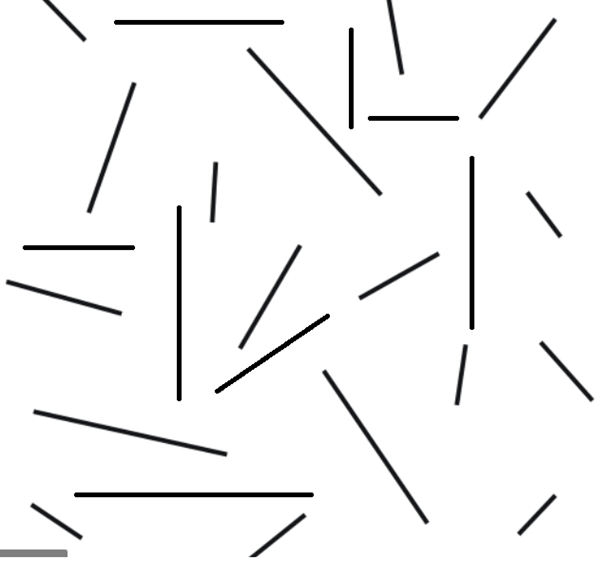
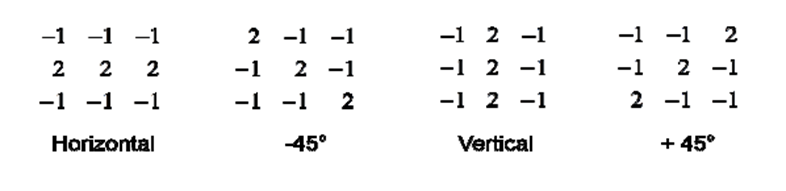

#### Reading and Displaying the Image

In [35]:
image = cv2.imread('image.png',0)

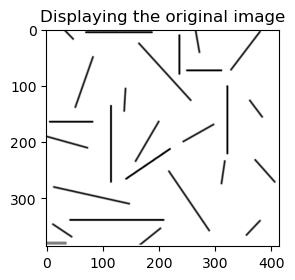

In [36]:
plt.figure(figsize = (3,3))
plt.imshow(image, cmap = 'gray')
plt.title('Displaying the original image')
plt.show()

#### Defining the four line detection filters

In [37]:
horizontal_filter = np.array([[-1, -1, -1],[2, 2, 2],[-1, -1, -1]])
diagonal_filter1 = np.array([[2, -1, -1],[-1, 2, -1],[-1, -1, -2]])
vertical_filter = np.array([[-1, 2, -1],[-1, 2, -1],[-1, 2, -1]])
diagonal_filter2 = np.array([[-1, -1, 2],[-1, 2, -1],[2, -1, -1]])

#### Applying Filters to the Image

In [38]:
horizontal_filtered = cv2.filter2D(image,-1,horizontal_filter)
diagonal1_filtered = cv2.filter2D(image,-1,diagonal_filter1)
vertical_filtered = cv2.filter2D(image,-1,vertical_filter)
diagonal2_filtered = cv2.filter2D(image,-1,diagonal_filter2)

#### Thresholding the filtered images to obtain the detected lines

In [39]:
filtered_horizontal = cv2.threshold(horizontal_filtered,0,255,cv2.THRESH_BINARY)[1]
filtered_diagonal1 = cv2.threshold(diagonal1_filtered,0,255,cv2.THRESH_BINARY)[1]
filtered_vertical = cv2.threshold(vertical_filtered,0,255,cv2.THRESH_BINARY)[1]
filtered_diagonal2 = cv2.threshold(diagonal2_filtered,0,255,cv2.THRESH_BINARY)[1]

#### Displaying Results

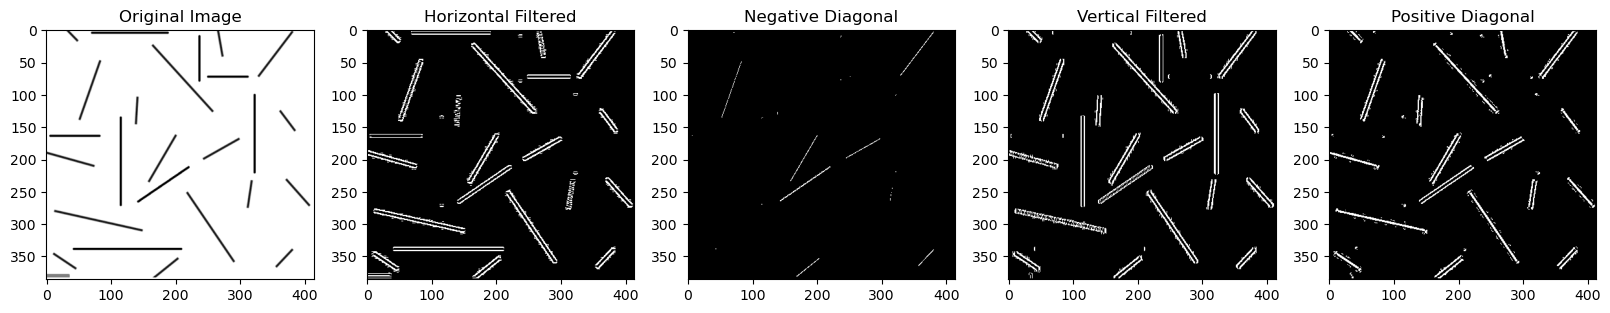

In [70]:
plt.figure(figsize = (20,5))
plt.subplot(1,5,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')

plt.subplot(1,5,2)
plt.imshow(filtered_horizontal,cmap='gray')
plt.title('Horizontal Filtered')

plt.subplot(1,5,3)
plt.imshow(filtered_diagonal1,cmap='gray')
plt.title('Negative Diagonal')

plt.subplot(1,5,4)
plt.imshow(filtered_vertical,cmap='gray')
plt.title('Vertical Filtered')

plt.subplot(1,5,5)
plt.imshow(filtered_diagonal2,cmap='gray')
plt.title('Positive Diagonal')

plt.show()

#### Task 2 - Find the horizontal and vertical edges in the following picture. Display both horizontal, vertical and combined edges. Use a sobel filter. Implement both using the filter and the built-in function.
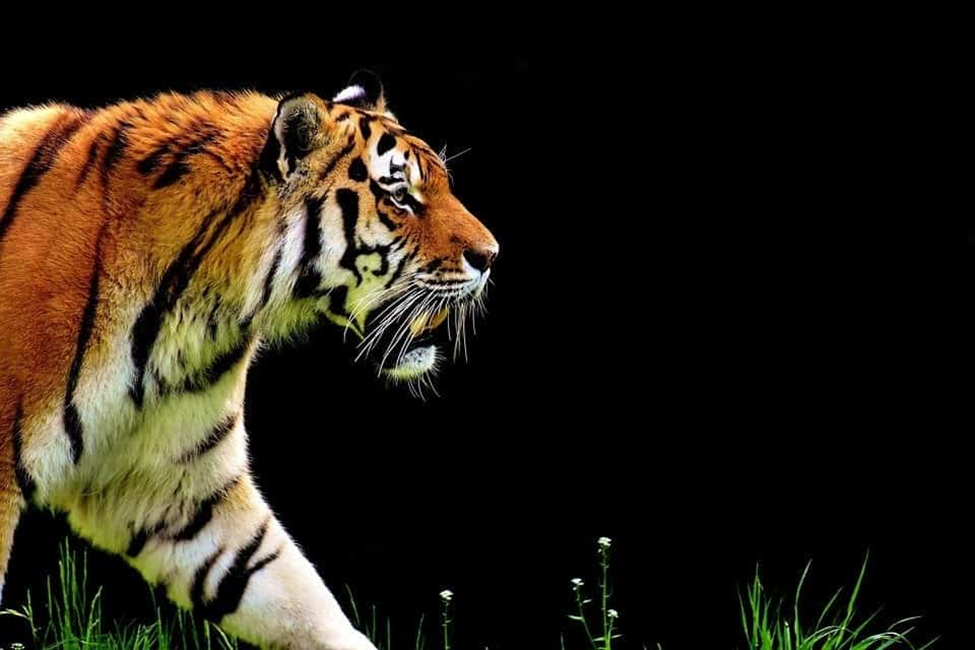

#### Reading and Displaying Image

In [41]:
image2 = cv2.imread('image2.png',0)

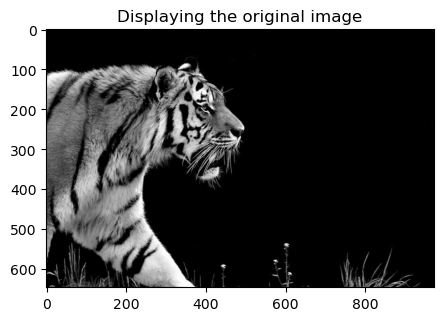

In [43]:
plt.figure(figsize = (5,5))
plt.imshow(image2, cmap = 'gray')
plt.title('Displaying the original image')
plt.show()

#### Applying the Sobel Filter using Filters

In [44]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
x_filter = cv2.filter2D(image2, -1, sobel_x)
y_filter = cv2.filter2D(image2, -1, sobel_y)

In [45]:
combined_edges = cv2.bitwise_or(x_filter, y_filter)

#### Displaying Results

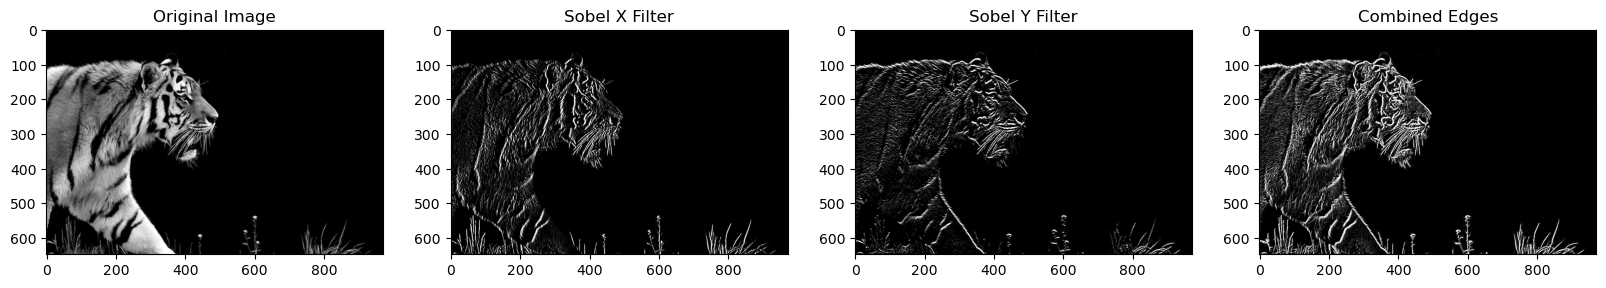

In [71]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(image2, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(x_filter, cmap='gray')
plt.title('Sobel X Filter')

plt.subplot(1, 4, 3)
plt.imshow(y_filter, cmap='gray')
plt.title('Sobel Y Filter')

plt.subplot(1, 4, 4)
plt.imshow(combined_edges, cmap='gray')
plt.title('Combined Edges')

plt.show()


#### Applying the Sobel Filter using Built-In Function

In [89]:
image3 = cv2.imread('image2.png',1)
image3 = cv2.GaussianBlur(image3, (3,3), 0)
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
sobel_x = cv2.Sobel(image3, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image3, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.Sobel(image3, cv2.CV_64F, 1, 1, ksize=3)

#### Normalize Sobel outputs to uint8 (0-255 range)

In [91]:
sobel_x_ = cv2.convertScaleAbs(sobel_x)
sobel_y_ = cv2.convertScaleAbs(sobel_y)
sobel_combined_ = cv2.convertScaleAbs(sobel_combined)

#### Displaying Results

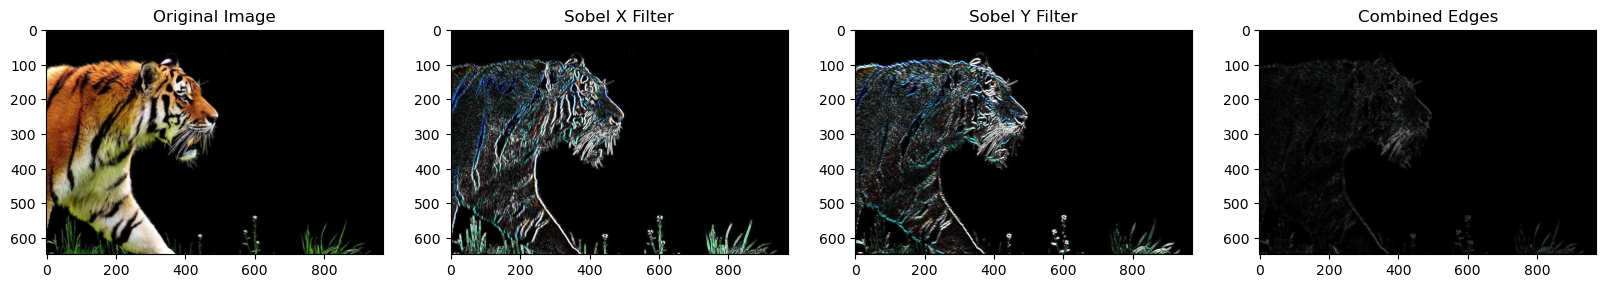

In [92]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(image3_rgb, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(sobel_x_, cmap='gray')
plt.title('Sobel X Filter')

plt.subplot(1, 4, 3)
plt.imshow(sobel_y_, cmap='gray')
plt.title('Sobel Y Filter')

plt.subplot(1, 4, 4)
plt.imshow(sobel_combined_, cmap='gray')
plt.title('Combined Edges')

plt.show()

#### Task 3 - Read the image ‘coin’, you have to get the required output image shown in figure below. Analyze the input image and make the decision yourself what to do to get the required output. Hint: Choose kernel/mask values yourself to get required output.
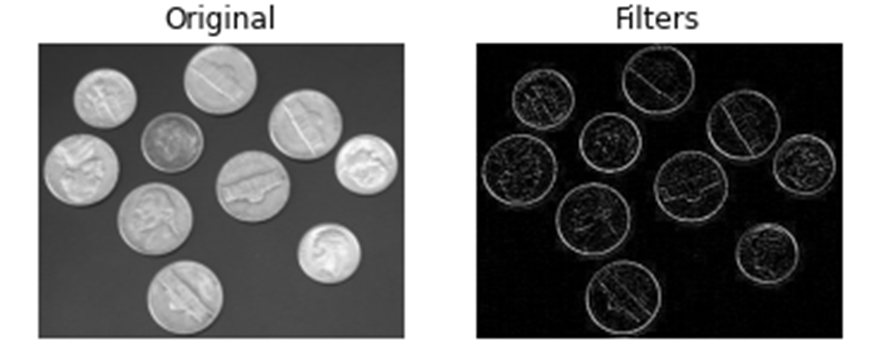

#### Reading and Displaying Image

In [98]:
coin = cv2.imread('image3.png', 0)

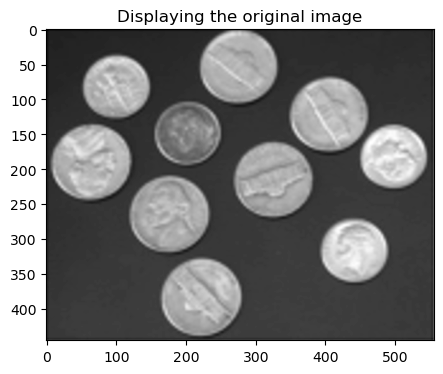

In [99]:
plt.figure(figsize = (5,5))
plt.imshow(coin, cmap = 'gray')
plt.title('Displaying the original image')
plt.show()

#### Using Canny Edge Detection (Built-In function)

In [104]:
canny = cv2.Canny(coin, threshold1 = 50, threshold2 = 150)

#### Displaying Results

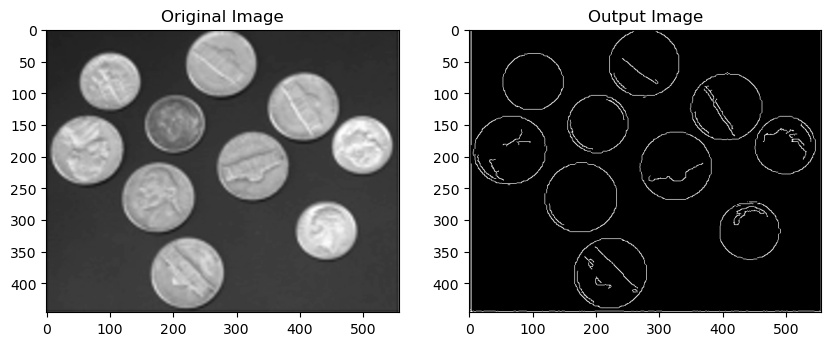

In [106]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.imshow(coin, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(canny, cmap='gray')
plt.title('Output Image')

plt.show()

#### Using Canny Edge Detection by Manual Masking

In [107]:
horizontal_mask = np.array([[-1,-1,-1], [2,2,2], [-1,-1,-1]])
vertical_mask = np.array([[-1,2,-1], [-1,2,-1], [-1,2,-1]])
diagonal_mask1 = np.array([[2,-1,-1], [-1,2,-1], [-1,-1,2]])
diagonal_mask2 = np.array([[-1,-1,2], [-1,2,-1], [2,-1,-1]])

horizontal = cv2.filter2D(coin, -1, horizontal_mask)
vertical = cv2.filter2D(coin, -1,vertical_mask)
diagonal1 = cv2.filter2D(coin, -1,diagonal_mask1)
diagonal2 = cv2.filter2D(coin, -1,diagonal_mask2)

#### Displaying Results

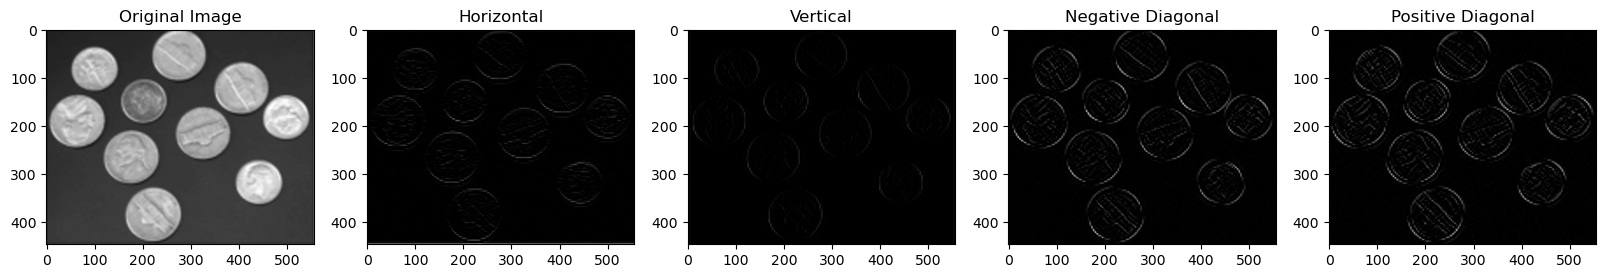

In [109]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 5, 1)
plt.imshow(coin, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 5, 2)
plt.imshow(horizontal, cmap='gray')
plt.title('Horizontal')

plt.subplot(1, 5, 3)
plt.imshow(vertical, cmap='gray')
plt.title('Vertical')

plt.subplot(1, 5, 4)
plt.imshow(diagonal1, cmap='gray')
plt.title('Negative Diagonal')


plt.subplot(1, 5, 5)
plt.imshow(diagonal2, cmap='gray')
plt.title('Positive Diagonal')

plt.show()